In [1]:
import pandas as pd
import missingno as msn
import os
import numpy as np
import re

In [ ]:
### Before starting cleaning process I must merge csv files.

# Specify the folder path containing CSV files
folder_path = 'Path/PC Laptops & Netbooks (Product Data)'

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Iterate through each CSV file and merge its data into the main DataFrame
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    merged_data = pd.concat([merged_data, df], ignore_index=True)

# Optionally, you can save the merged data to a new CSV file
merged_data.to_csv('Path/EbayPcLaptopsAndNetbooks.csv', index=False)

# Print the merged data
print(merged_data)

In [2]:
# Load the csv file.
# All products buying format are: 'Buy it now'.

df = pd.read_csv('C:/Users/maham/Desktop/Datasets/Ebay/EbayPcLaptopsAndNetbooksUnclean.csv')

df.head()

,Brand,Price,Rating,Ratings Count,Condition,Seller Note,Processor,Screen Size,Manufacturer Color,Color,...,Processor Speed,Type,Release Year,Maximum Resolution,Model,OS,Features,Hard Drive Capacity,Country Region Of Manufacture,Storage Type
0,CHUWI,$303.68,NaN,NaN,"New: A brand-new, unused, unopened, undamaged ...",NaN,Quad Core,14 in,NaN,Gray,...,Max up to 3.80 GHz,Notebook/Laptop,2021,2160 x 1440,CoreBook X,Windows 11 Home,"Backlit Keyboard, Built-in Microphone, Built...",512 GB SSD,China,SSD (Solid State Drive)
1,Dell,$399.99 to $634.99,NaN,NaN,Very Good - RefurbishedThe item shows minimal ...,“AAA PCs is a Microsoft Authorized Refurbisher...,Intel Core i7 8th Gen.,14 in,NaN,Black,...,4.20 GHz (1.90 GHz Base Frequency),Notebook/Laptop,Refurbished in 2023,1920 x 1080,Dell Latitude 7490,Windows 11 Pro,"Backlit Keyboard, Bluetooth, Built-in Micropho...",2 TB,NaN,SSD (Solid State Drive)
2,Dell,$175.00,NaN,NaN,UsedAn item that has been used previously. The...,"“Well kept, fully functional, includes battery...",Intel Core i5-6300U,14 in,NaN,Black,...,2.40 GHz,Notebook/Laptop,2019,1920 x 1080,Dell Latitude E5470,Windows 10 Pro,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",500 GB,China,SSD (Solid State Drive)
3,HP,$84.99,NaN,NaN,Good - RefurbishedThe item shows moderate wear...,“1-Year Allstate warranty. The original HP cha...,Intel Celeron N,11.6 in,NaN,Black,...,2.40 GHz,Notebook/Laptop,NaN,1366 x 768,HP Chromebook 11 G6,Chrome OS,"Bluetooth, Built-in Microphone, Built-in Webca...",16 GB,NaN,eMMC
4,Dell,$101.22,NaN,NaN,Good - RefurbishedThe item shows moderate wear...,“Laptops is tested & fully working with some s...,Intel Core i5 6th Gen.,"Minimum 12.5""",NaN,NaN,...,Minimum 1.40 GHz,Notebook/Laptop,2015,1366 x 768,Various Models,Windows 10,"10/100 LAN Card, Built-in Microphone, Built-in...",NO HDD,NaN,SSD (Solid State Drive)


##### First impression about the dataset:

- In 'Price' section there are two useful information: price currency and price. And this column probably contains values like '399.99 to 634.99'. I will choose minimum price from values like this (Price changes when buyer changes the parameters of the pc/netbooks).
- Most of the columns have missing values. There missing values because products don't have these values (For example: in 'Rating' and 'Rating Count' column some products values are missing this is because of no one rated it).

In [3]:
# Brief information about the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Brand                          4024 non-null   object 
 1   Price                          6620 non-null   object 
 2   Rating                         286 non-null    object 
 3   Ratings Count                  286 non-null    float64
 4   Condition                      6004 non-null   object 
 5   Seller Note                    1442 non-null   object 
 6   Processor                      3837 non-null   object 
 7   Screen Size                    3890 non-null   object 
 8   Manufacturer Color             185 non-null    object 
 9   Color                          2149 non-null   object 
 10  Ram Size                       2112 non-null   object 
 11  SSD Capacity                   2780 non-null   object 
 12  GPU                            3088 non-null   o

##### Information about the dataset:
- There are 23 columns and 6620 rows.
- Most of the columns contain many missing values. This is because of the seller (Sellet doesn't add information about the product).
- 'Price' column has no missing values (This column is the most important column in the dataset).
- 22 columns data types are object (text). 1 column data type is numeric (float).

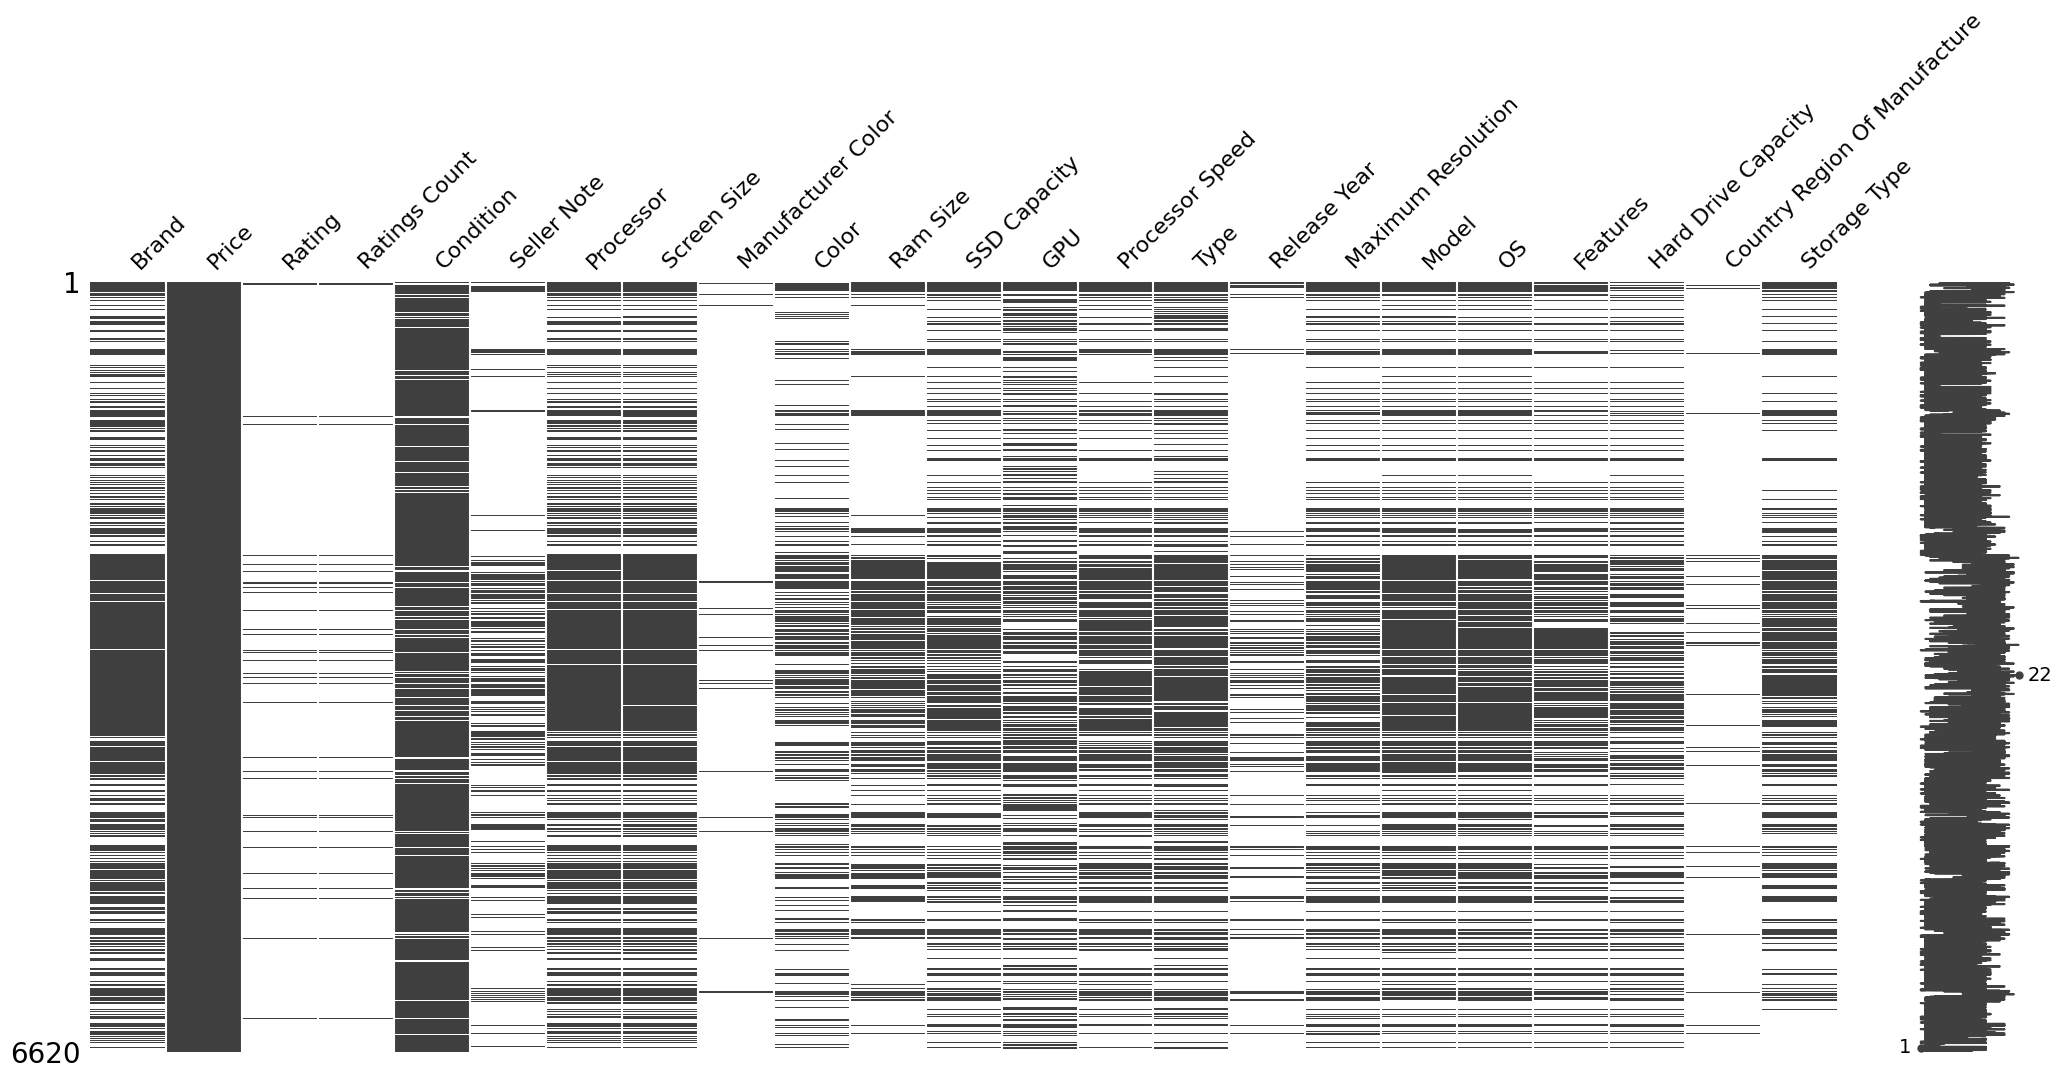

In [4]:
# Missing values
msn.matrix(df);

In [5]:
# If a column's contain over 80% (Can be different values) missing values I will drop the column.

def drop_na(dataset):
    missing_values_percentage = dataset.isna().sum() / dataset.shape[0]
    for c, p in zip(missing_values_percentage.index, missing_values_percentage.values):
        print(f'Column -- {c} contains {round(p, 2)}% missing values.')
        if p > 0.8:
            dataset = dataset.drop([c], axis=1)
    return dataset

data = drop_na(df)

Column -- Brand contains 0.39% missing values.
Column -- Price contains 0.0% missing values.
Column -- Rating contains 0.96% missing values.
Column -- Ratings Count contains 0.96% missing values.
Column -- Condition contains 0.09% missing values.
Column -- Seller Note contains 0.78% missing values.
Column -- Processor contains 0.42% missing values.
Column -- Screen Size contains 0.41% missing values.
Column -- Manufacturer Color contains 0.97% missing values.
Column -- Color contains 0.68% missing values.
Column -- Ram Size contains 0.68% missing values.
Column -- SSD Capacity contains 0.58% missing values.
Column -- GPU contains 0.53% missing values.
Column -- Processor Speed contains 0.6% missing values.
Column -- Type contains 0.5% missing values.
Column -- Release Year contains 0.88% missing values.
Column -- Maximum Resolution contains 0.63% missing values.
Column -- Model contains 0.52% missing values.
Column -- OS contains 0.54% missing values.
Column -- Features contains 0.62% 

In [6]:
data['Brand'] = data['Brand'].str.lower()

most_used = [i for i in data['Brand'].value_counts()[:10].index] # This the top 10 brands. There is a value called 'unbranded'. I will remove this value from the list. I also remove 'fujitsu siemens' because there is already 'fujitsu'.
# I will use most_used list to search values in 'Brand' column.
data['Brand'] = data['Brand'].str.replace('fujitsu siemens', 'fujitsu')

new_brands = []
for v in data['Brand']:
    brands = []
    if isinstance(v, float):
        new_brands.append('other')
    else:
        for b in most_used:
            if b in v:
                brands.append(b)

        if len(brands) > 1:
            new_brands.append('other')
        elif len(brands) == 0:
            new_brands.append('other')
        else:
            new_brands.append(brands[0])

data['Brand New'] = new_brands

In [8]:
data.loc[:, ['Brand', 'Brand New']]

,Brand,Brand New
0,chuwi,other
1,dell,dell
2,dell,dell
3,hp,hp
4,dell,dell
...,...,...
6615,NaN,other
6616,NaN,other
6617,NaN,other
6618,lenovo,lenovo


In [9]:
# Let's convert 'Price' column to right format.
new_prices = []
currency = []
for i in data['Price']:
    new_prices.append(i[1:].split('to')[0].replace(',', ''))
    currency.append(i[0])

data['Price New'] = new_prices
data['Price New'] = data['Price New'].astype('float16')

data['Currency'] = currency

In [10]:
data.loc[:, ['Price', 'Price New', 'Currency']]

,Price,Price New,Currency
0,$303.68,303.7500,$
1,$399.99 to $634.99,400.0000,$
2,$175.00,175.0000,$
3,$84.99,85.0000,$
4,$101.22,101.2500,$
...,...,...,...
6615,$108.06,108.0625,$
6616,"$2,108.99",2108.0000,$
6617,$105.86,105.8750,$
6618,$567.74,567.5000,$


In [11]:
condition_value_dict = {
    'New': "A brand-new, unused, unopened, undamaged item in its original packaging (where packaging is applicable). Packaging should be the same as what is found in a retail store, unless the item is handmade or was packaged by the manufacturer in non-retail packaging, such as an unprinted box or plastic bag. See the seller's listing for full details.",

    'New other': "A new, unused item with absolutely no signs of wear. The item may be missing the original packaging, or in the original packaging but not sealed. The item may be a factory second or a new, unused item with defects. See the seller's listing for full details and description of any imperfections.",

    'Open box': "An item in excellent, new condition with no wear. The item may be missing the original packaging or protective wrapping, or may be in the original packaging but not sealed. The item includes original accessories. The item may be a factory second. See the seller's listing for full details and description.",

    'Certified - Refurbished': "The item is in a pristine, like-new condition. It has been professionally inspected, cleaned, and refurbished by the manufacturer or a manufacturer-approved vendor to meet manufacturer specifications. The item will be in new packaging with original or new accessories. See the seller's listing for full details.",

    'Excellent - Refurbished': "The item is in like-new condition, backed by a one year warranty. It has been professionally refurbished, inspected and cleaned to excellent condition by qualified sellers. The item includes original or new accessories and will come in new generic packaging. See the seller's listing for full details.",

    'Very Good - Refurbished': "The item shows minimal wear and is backed by a one year warranty. It is fully functional and has been professionally refurbished, inspected and cleaned to very good condition by qualified sellers. The item includes original or new accessories and will come in new generic packaging. See the seller's listing for full details.",

    'Good - Refurbished': "The item shows moderate wear and is backed by a one year warranty. It is fully functional and has been professionally refurbished, inspected and cleaned to good condition by qualified sellers. The item includes original or new accessories and will come in a new generic packaging. See the seller's listing for full details.",

    'Seller refurbished': "The item has been restored to working order by the eBay seller or a third party. This means the item was inspected, cleaned, and repaired to full working order and is in excellent condition. This item may or may not be in original packaging. See seller's listing for full details.",

    'Used': "An item that has been used previously. The item may have some signs of cosmetic wear, but is fully operational and functions as intended. This item may be a floor model or store return that has been used. See the seller's listing for full details and description of any imperfections.",

    'For parts or not working': "An item that does not function as intended and is not fully operational. This includes items that are defective in ways that render them difficult to use, items that require service or repair, items that are locked or can't be activated, or items missing essential components. See the seller's listing for full details."
}

In [12]:
new_condition_value = []
new_condition_description = []

for r in data['Condition']:
    current_length = len(new_condition_value)
    if isinstance(r, float):
        new_condition_value.append('Undefined')
        new_condition_description.append('Undefined')
    else:
        for k in condition_value_dict.keys():
            if k in r:
                new_condition_value.append(k)
                new_condition_description.append(condition_value_dict[k])
                break
        new_length = len(new_condition_value)

        if current_length == new_length:
            new_condition_value.append('Undefined')
            new_condition_description.append('Undefined')

data['New Condition'] = new_condition_value
data['New Condition Description'] = new_condition_description

In [13]:
data.loc[:, ["Condition", "New Condition", "New Condition Description"]]

,Condition,New Condition,New Condition Description
0,"New: A brand-new, unused, unopened, undamaged ...",New,"A brand-new, unused, unopened, undamaged item ..."
1,Very Good - RefurbishedThe item shows minimal ...,Very Good - Refurbished,The item shows minimal wear and is backed by a...
2,UsedAn item that has been used previously. The...,Used,An item that has been used previously. The ite...
3,Good - RefurbishedThe item shows moderate wear...,Good - Refurbished,The item shows moderate wear and is backed by ...
4,Good - RefurbishedThe item shows moderate wear...,Good - Refurbished,The item shows moderate wear and is backed by ...
...,...,...,...
6615,"New: A brand-new, unused, unopened, undamaged ...",New,"A brand-new, unused, unopened, undamaged item ..."
6616,Seller refurbished: The item has been restored...,Seller refurbished,The item has been restored to working order by...
6617,"New: A brand-new, unused, unopened, undamaged ...",New,"A brand-new, unused, unopened, undamaged item ..."
6618,NaN,Undefined,Undefined


In [14]:
def remove_emojis(input_string):
    # Define a regular expression pattern to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)

    # Remove emojis using the regex pattern
    result = emoji_pattern.sub('', input_string)

    return result

In [15]:
new_seller_note = []
for r in data['Seller Note']:
    if isinstance(r, float):
        new_seller_note.append('undefined')
    else:
        start = r.find('Read moreabout the seller notes') + 31
        end = r.find('Read lessabout the seller notes') - 31
        if start == 30:
            r = re.sub('[“”]', ' ', r).strip()
        else:
            r = re.sub('[“”]', ' ', r[start:end]).strip()


        r = re.sub('-+', '-', r)
        r = re.sub('\s+', ' ', r)
        r = re.sub('\*+', '', r)
        r = remove_emojis(r)

        new_seller_note.append(r.lower().strip())

data['New Seller Note'] = new_seller_note

In [16]:
data.loc[:, ['Seller Note', 'New Seller Note']]

,Seller Note,New Seller Note
0,NaN,undefined
1,“AAA PCs is a Microsoft Authorized Refurbisher...,aaa pcs is a microsoft authorized refurbisher ...
2,"“Well kept, fully functional, includes battery...","well kept, fully functional, includes battery,..."
3,“1-Year Allstate warranty. The original HP cha...,1-year allstate warranty. the original hp char...
4,“Laptops is tested & fully working with some s...,laptops is tested & fully working with some si...
...,...,...
6615,NaN,undefined
6616,NaN,undefined
6617,NaN,undefined
6618,NaN,undefined


In [17]:
data['New Processor'] = data['Processor'].str.lower().replace({'?':'undefined', 'unknown':'undefined', 'none':'undefined', 'no':'undefined', '^?':'undefined', 'does not apply':'not applicable'})
data['New Processor'] = data['New Processor'].replace({'gen\.':'generation'}, regex=True)
data['New Processor'].fillna('undefined', inplace=True)

In [18]:
data.loc[:, ['Processor', 'New Processor']]

,Processor,New Processor
0,Quad Core,quad core
1,Intel Core i7 8th Gen.,intel core i7 8th generation
2,Intel Core i5-6300U,intel core i5-6300u
3,Intel Celeron N,intel celeron n
4,Intel Core i5 6th Gen.,intel core i5 6th generation
...,...,...
6615,NaN,undefined
6616,NaN,undefined
6617,NaN,undefined
6618,NaN,undefined


In [19]:
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black', 'white', 'silver', 'platinum', 'beige', 'bronze', 'teal', 'gold', 'grey']
new_colors = []

for cc in data['Color'].str.lower().replace({'negro':'black'}):
    if isinstance(cc, float):
        new_colors.append('other')
    else:
        if 'multi' in cc:
            new_colors.append('multicolor')
        else:
            n = []
            for c in colors:
                if c in cc:
                    n.append(c)
            if len(n) == 1:
                new_colors.append(n[0])
            elif len(n) > 1:
                new_colors.append('multicolor')
            else:
                new_colors.append('other')
data['New Color'] = new_colors

In [20]:
data.loc[:, ['Color', 'New Color']]

,Color,New Color
0,Gray,gray
1,Black,black
2,Black,black
3,Black,black
4,NaN,other
...,...,...
6615,NaN,other
6616,Negro,black
6617,NaN,other
6618,Black,black


In [21]:
new_gpu = []
for i in data['GPU'].str.lower():
    if isinstance(i, float):
        new_gpu.append('other')
    elif 'intel' in i:
        new_gpu.append('intel')
    elif ('amd' in i) or ('radeon' in i):
        new_gpu.append('amd')
    elif ('nvidia' in i) or ('geforce' in i):
        new_gpu.append('nvidia')
    elif 'mali' in i:
        new_gpu.append('mali')
    else:
        new_gpu.append('other')
data['New GPU'] = new_gpu

In [22]:
data.loc[:, ['GPU', 'New GPU']]

,GPU,New GPU
0,Intel Iris Plus Graphics 655,intel
1,Intel UHD Graphics 620,intel
2,Intel HD Graphics,intel
3,Intel HD Graphics 500,intel
4,Integrated,other
...,...,...
6615,NaN,other
6616,Gráficos Intel UHD 620,intel
6617,NaN,other
6618,NaN,other


In [23]:
type_ = []

for i in data['Type'].str.lower():
    if isinstance(i, float):
        type_.append('other')
    elif ('netbook' in i) or ('notebook' in i) or ('laptop' in i):
        type_.append('notebook/laptop')
    else:
        type_.append('other')

data['New Type'] = type_

In [24]:
data.loc[:, ['Type', 'New Type']]

,Type,New Type
0,Notebook/Laptop,notebook/laptop
1,Notebook/Laptop,notebook/laptop
2,Notebook/Laptop,notebook/laptop
3,Notebook/Laptop,notebook/laptop
4,Notebook/Laptop,notebook/laptop
...,...,...
6615,NaN,other
6616,NaN,other
6617,NaN,other
6618,Notebook/Laptop,notebook/laptop


In [25]:
new_processor_speed = []
processor_speed_unit = []

for i in data['Processor Speed'].str.lower():

    if isinstance(i, float):
        new_processor_speed.append(np.nan)
        processor_speed_unit.append('unknown')
    else:
        if i.find('ghz') != -1:
            processor_speed_unit.append('GHz')
        elif i.find('mhz') != -1:
            processor_speed_unit.append('MHz')
        else:
            processor_speed_unit.append('unknown')

        if 'hz' in i:
            i = ''.join(i.split())
            if i.find('hz') - 5 < 0:
                new_processor_speed.append(i[:i.find('hz')-1])
            else:
                new_processor_speed.append(i[i.find('hz')-5:i.find('hz')-1])
        else:
            new_processor_speed.append(np.nan)


data['New Processor Speed'] = new_processor_speed
data['Processor Speed Unit'] = processor_speed_unit

In [26]:
data.loc[:, ['Processor Speed', 'New Processor Speed', 'Processor Speed Unit']]

,Processor Speed,New Processor Speed,Processor Speed Unit
0,Max up to 3.80 GHz,3.80,GHz
1,4.20 GHz (1.90 GHz Base Frequency),4.20,GHz
2,2.40 GHz,2.40,GHz
3,2.40 GHz,2.40,GHz
4,Minimum 1.40 GHz,1.40,GHz
...,...,...,...
6615,NaN,NaN,unknown
6616,NaN,NaN,unknown
6617,NaN,NaN,unknown
6618,NaN,NaN,unknown


In [27]:
resolution_dic = {
    'full hd': ['1920', '1080 '], # width, height
    'hd': ['1280', '720'],
    '2k': ['2048', '1080'],
    '4k': ['3840', '2160']
}
width = []
height = []

for i in data['Maximum Resolution'].str.lower():
    if isinstance(i, float):
        width.append(np.nan)
        height.append(np.nan)
    elif ''.join(i.split()).isalpha():
        if resolution_dic.get(i) == None:
            width.append(np.nan)
            height.append(np.nan)
        else:
            width.append(resolution_dic.get(i)[0])
            height.append(resolution_dic.get(i)[1])
    elif 'k' in i:
        if resolution_dic.get(i) == None:
            width.append(np.nan)
            height.append(np.nan)
        else:
            width.append(resolution_dic.get(i)[0])
            height.append(resolution_dic.get(i)[1])
    else:
        if len(i.split('x')) == 2:
            width.append(re.sub("[a-z()]", '', i.split('x')[0]).strip())
            height.append(re.sub("[a-z()]", '', i.split('x')[1]).strip())
        else:
            width.append(np.nan)
            height.append(np.nan)

data['Width of the Display'] = width
data['Height of the Display'] = height

In [28]:
data.loc[:, ['Maximum Resolution', 'Width of the Display', 'Height of the Display']]

,Maximum Resolution,Width of the Display,Height of the Display
0,2160 x 1440,2160,1440
1,1920 x 1080,1920,1080
2,1920 x 1080,1920,1080
3,1366 x 768,1366,768
4,1366 x 768,1366,768
...,...,...,...
6615,NaN,NaN,NaN
6616,NaN,NaN,NaN
6617,NaN,NaN,NaN
6618,NaN,NaN,NaN


In [29]:
# There is a 'brand' feature. Because Of that I can remove 'Model' column. I will do it at the end.
data[['Model']]

,Model
0,CoreBook X
1,Dell Latitude 7490
2,Dell Latitude E5470
3,HP Chromebook 11 G6
4,Various Models
...,...
6615,NaN
6616,NaN
6617,NaN
6618,NaN


In [30]:
new_os = []
for os in data['OS'].str.lower():
    if isinstance(os, float):
        new_os.append('unknown')
    elif ('linux' in os) or ('kali' in os) or ('ubuntu' in os):
        new_os.append('linux')
    elif ('window' in os) or ('windows' in os) or ('win' in os):
        new_os.append('windows')
    elif 'chrome' in os:
        new_os.append('chrome')
    elif 'android' in os:
        new_os.append('android')
    elif ('mac' in os) or ('macos' in os):
        new_os.append('mac')
    else:
        new_os.append('unknown')

data['New OS'] = new_os

In [31]:
data.loc[:, ['OS', 'New OS']]

,OS,New OS
0,Windows 11 Home,windows
1,Windows 11 Pro,windows
2,Windows 10 Pro,windows
3,Chrome OS,chrome
4,Windows 10,windows
...,...,...
6615,NaN,unknown
6616,NaN,unknown
6617,NaN,unknown
6618,NaN,unknown


In [32]:
new_storage_type = []
for st in data['Storage Type'].str.lower():
    if isinstance(st, float):
        new_storage_type.append('unknown')
    elif 'ssd' and 'hdd' in st:
        new_storage_type.append('hdd/ssd')
    elif 'ssd' in st:
        new_storage_type.append('ssd')
    elif 'hdd' in st:
        new_storage_type.append('hdd')
    elif 'emmc' in st:
        new_storage_type.append('emmc')
    else:
        new_storage_type.append('other')

data['New Storage Type'] = new_storage_type

In [33]:
data.loc[:, ['Storage Type', 'New Storage Type']]

,Storage Type,New Storage Type
0,SSD (Solid State Drive),ssd
1,SSD (Solid State Drive),ssd
2,SSD (Solid State Drive),ssd
3,eMMC,emmc
4,SSD (Solid State Drive),ssd
...,...,...
6615,NaN,unknown
6616,NaN,unknown
6617,NaN,unknown
6618,NaN,unknown


In [34]:
# I will not change the 'Features' column.
data[['Features']]

,Features
0,"Backlit Keyboard, Built-in Microphone, Built..."
1,"Backlit Keyboard, Bluetooth, Built-in Micropho..."
2,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ..."
3,"Bluetooth, Built-in Microphone, Built-in Webca..."
4,"10/100 LAN Card, Built-in Microphone, Built-in..."
...,...
6615,NaN
6616,NaN
6617,NaN
6618,NaN


In [35]:
# Let's make function for cleaning three columns: Hard Drive Capacity, SSD Capacity and Ram Size.

def cleaning_function(dataframe, c):
    new_capacity = []
    new_capacity_unit = []

    for i in dataframe[c].str.lower():
        if isinstance(i, float):
            new_capacity.append(np.nan)
            new_capacity_unit.append('unknown')
        elif ''.join(i.split()).isalpha():
            new_capacity.append(np.nan)
            new_capacity_unit.append('unknown')
        else:
            i = ''.join(i.split())
            if 'gb' in i:
                new_capacity_unit.append('gb')
                txt = re.sub('[a-z]', '', i[:i.find('gb')])
                if txt.isdecimal():
                    new_capacity.append(txt)
                else:
                    new_capacity.append(np.nan)
            elif 'tb' in i:
                new_capacity_unit.append('tb')
                new_capacity.append(i[i.find('tb')-1:i.find('tb')])
            elif 'mb' in i:
                new_capacity_unit.append('mb')
                txt = re.sub('[a-z]', '', i[:i.find('mb')])
                if txt.isdecimal():
                    new_capacity.append(txt)
                else:
                    new_capacity.append(np.nan)
            else:
                new_capacity_unit.append('unknown')
                new_capacity.append(np.nan)

    return new_capacity, new_capacity_unit

In [36]:
new_hard_drive_capacity, new_hard_drive_capacity_unit = cleaning_function(data, 'Hard Drive Capacity')

data['New Hard Drive Capacity'] = new_hard_drive_capacity
data['Hard Drive Capacity Unit'] = new_hard_drive_capacity_unit

data.loc[:, ['Hard Drive Capacity', 'New Hard Drive Capacity', 'Hard Drive Capacity Unit']]

,Hard Drive Capacity,New Hard Drive Capacity,Hard Drive Capacity Unit
0,512 GB SSD,512,gb
1,2 TB,2,tb
2,500 GB,500,gb
3,16 GB,16,gb
4,NO HDD,NaN,unknown
...,...,...,...
6615,NaN,NaN,unknown
6616,NaN,NaN,unknown
6617,NaN,NaN,unknown
6618,NaN,NaN,unknown


In [37]:
new_ssd_drive_capacity, new_ssd_capacity_unit = cleaning_function(data, 'SSD Capacity')

data['New SSD Capacity'] = new_ssd_drive_capacity
data['SSD Capacity Unit'] = new_ssd_capacity_unit

data.loc[:, ['SSD Capacity', 'New SSD Capacity', 'SSD Capacity Unit']]

,SSD Capacity,New SSD Capacity,SSD Capacity Unit
0,"1 Used, 1 support Max 1TB M.2 Extend",1,tb
1,NaN,NaN,unknown
2,500 GB,500,gb
3,NaN,NaN,unknown
4,256 GB,256,gb
...,...,...,...
6615,NaN,NaN,unknown
6616,NaN,NaN,unknown
6617,NaN,NaN,unknown
6618,NaN,NaN,unknown


In [38]:
new_ram_size, new_ram_size_unit = cleaning_function(data, 'Ram Size')

data['New Ram Size'] = new_ram_size
data['Ram Size Unit'] = new_ram_size_unit

data.loc[:, ['Ram Size', 'New Ram Size', 'Ram Size Unit']]

,Ram Size,New Ram Size,Ram Size Unit
0,8 GB,8,gb
1,NaN,NaN,unknown
2,16 GB,16,gb
3,4 GB,4,gb
4,8 GB,8,gb
...,...,...,...
6615,NaN,NaN,unknown
6616,NaN,NaN,unknown
6617,NaN,NaN,unknown
6618,NaN,NaN,unknown


In [39]:
# Let's look at 'Screen Size' column. If all of them contain 'in' or '"'
data['Screen Size'] = data['Screen Size'].str.replace(',', '.')
data['Screen Size'] = data['Screen Size'].str.replace('"', 'inch')
data['Screen Size'] = data['Screen Size'].str.replace("in", "inch")

new_screen_size = []

for v in data['Screen Size'].str.lower():
    if isinstance(v, float):
        new_screen_size.append(np.nan)
    elif 'inch' in v:
        size = ''.join(re.sub("[a-z]", '', v).split())
        if len(size) > 4:
           new_screen_size.append(size[:5])
        else:
            new_screen_size.append(size)
    else:
        new_screen_size.append(np.nan)

data['Screen Size (inch)'] = new_screen_size

In [40]:
data.loc[:, ['Screen Size', 'Screen Size (inch)']]

,Screen Size,Screen Size (inch)
0,14 inch,14
1,14 inch,14
2,14 inch,14
3,11.6 inch,11.6
4,Minchimum 12.5inchch,12.5
...,...,...
6615,NaN,NaN
6616,NaN,NaN
6617,NaN,NaN
6618,NaN,NaN


In [41]:
# Drop the old columns.
data.drop(['Brand', 'Price', 'Condition', 'Seller Note', 'Processor', 'Screen Size', 'Color', 'Ram Size', 'SSD Capacity', 'GPU', 'Processor Speed', 'Type', 'Maximum Resolution', 'Model', 'OS', 'Hard Drive Capacity', 'Storage Type'], axis=1, inplace=True)

In [42]:
column_names = {}
for i in data.columns:
    if 'New' in i:
       column_names[i] = re.sub('New', '', i).strip()

data.rename(columns=column_names, inplace=True)

In [43]:
data = data[['Brand', 'Price', 'Currency', 'Color', 'Features', 'Condition', 'Condition Description', 'Seller Note', 'GPU', 'Processor', 'Processor Speed', 'Processor Speed Unit', 'Type', 'Width of the Display', 'Height of the Display', 'OS', 'Storage Type', 'Hard Drive Capacity', 'Hard Drive Capacity Unit', 'SSD Capacity', 'SSD Capacity Unit', 'Screen Size (inch)', 'Ram Size', 'Ram Size Unit']]

In [44]:
data.head()

,Brand,Price,Currency,Color,Features,Condition,Condition Description,Seller Note,GPU,Processor,...,Height of the Display,OS,Storage Type,Hard Drive Capacity,Hard Drive Capacity Unit,SSD Capacity,SSD Capacity Unit,Screen Size (inch),Ram Size,Ram Size Unit
0,other,303.75,$,gray,"Backlit Keyboard, Built-in Microphone, Built...",New,"A brand-new, unused, unopened, undamaged item ...",undefined,intel,quad core,...,1440,windows,ssd,512,gb,1,tb,14,8,gb
1,dell,400.00,$,black,"Backlit Keyboard, Bluetooth, Built-in Micropho...",Very Good - Refurbished,The item shows minimal wear and is backed by a...,aaa pcs is a microsoft authorized refurbisher ...,intel,intel core i7 8th generation,...,1080,windows,ssd,2,tb,NaN,unknown,14,NaN,unknown
2,dell,175.00,$,black,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",Used,An item that has been used previously. The ite...,"well kept, fully functional, includes battery,...",intel,intel core i5-6300u,...,1080,windows,ssd,500,gb,500,gb,14,16,gb
3,hp,85.00,$,black,"Bluetooth, Built-in Microphone, Built-in Webca...",Good - Refurbished,The item shows moderate wear and is backed by ...,1-year allstate warranty. the original hp char...,intel,intel celeron n,...,768,chrome,emmc,16,gb,NaN,unknown,11.6,4,gb
4,dell,101.25,$,other,"10/100 LAN Card, Built-in Microphone, Built-in...",Good - Refurbished,The item shows moderate wear and is backed by ...,laptops is tested & fully working with some si...,other,intel core i5 6th generation,...,768,windows,ssd,NaN,unknown,256,gb,12.5,8,gb


In [57]:
data.drop_duplicates(inplace=True)

In [58]:
data.to_csv('EbayPcLaptopsAndNetbooksClean.csv', index=False)

In [59]:
data.to_excel('EbayPcLaptopsAndNetbooksClean.xlsx', index=False)